<a href="https://colab.research.google.com/github/rylan-berry/DeepLearningIndependentStudy/blob/main/feedforwardnetwork_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Forward Pass

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]],dtype='f')
y = np.array([[0],[1],[1],[0]],dtype='f')

In [ ]:
x, y

(array([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], dtype=float32),
 array([[0.],
        [1.],
        [1.],
        [0.]], dtype=float32))

In [ ]:
W = 2*np.random.rand(2,2)-1
b = 2*np.random.rand(1,2)-1
w = 2*np.random.rand(2,1)-1
W, b, w

(array([[ 0.21031362,  0.45673778],
        [ 0.95774235, -0.33653071]]),
 array([[ 0.95223096, -0.02796351]]),
 array([[-0.09647464],
        [ 0.46576377]]))

In [ ]:
W = np.ones_like(W)
b = np.zeros_like(b)
w = np.ones_like(w)

W, b, w

(array([[1., 1.],
        [1., 1.]]),
 array([[0., 0.]]),
 array([[1.],
        [1.]]))

In [ ]:
h = x @ W + b
h

array([[0., 0.],
       [1., 1.],
       [1., 1.],
       [2., 2.]])

In [ ]:
m = np.maximum(0, h)
m

array([[0., 0.],
       [1., 1.],
       [1., 1.],
       [2., 2.]])

In [ ]:
y1 = m @ w
y1

array([[0.],
       [2.],
       [2.],
       [4.]])

In [ ]:
y

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
error = pow((y-y1),2)/2
error

array([[0. ],
       [0.5],
       [0.5],
       [8. ]])

##Backpropagation

In [ ]:
lr = -0.1

In [ ]:
y_g = y-y1
y_g

array([[ 0.],
       [-1.],
       [-1.],
       [-4.]])

In [ ]:
y_g.shape, m.shape

((4, 1), (4, 2))

In [ ]:
w_g = m.T @ y_g
w_g

array([[-10.],
       [-10.]])

In [ ]:
m_g = w.T * y_g
m_g

array([[ 0.,  0.],
       [-1., -1.],
       [-1., -1.],
       [-4., -4.]])

In [ ]:
h_g = m_g * (h > 0)
h_g

array([[ 0.,  0.],
       [-1., -1.],
       [-1., -1.],
       [-4., -4.]])

In [ ]:
b_g = np.sum(h_g,axis=0,keepdims=True)
b_g

array([[-6., -6.]])

In [ ]:
W_g = x.T @ h_g
W_g

array([[-5., -5.],
       [-5., -5.]])

##Update Parameters

In [ ]:
w += lr * w_g
w

array([[2.],
       [2.]])

In [ ]:
W += lr * W_g
W

array([[1.5, 1.5],
       [1.5, 1.5]])

In [ ]:
b += lr * b_g
b

array([[0.6, 0.6]])

##Re-write into training loop (along with random initializaton of parameters)

In [ ]:
epochs = 10000
lr = -0.01

In [ ]:
supError = []

In [ ]:
W = 2*np.random.rand(2,2)-1
b = 2*np.random.rand(1,2)-1
w = 2*np.random.rand(2,1)-1

In [ ]:
W,b,w

(array([[-0.27620174, -0.77568187],
        [-0.57696387,  0.27045211]]),
 array([[0.50501569, 0.47254759]]),
 array([[0.32631971],
        [0.61562424]]))

In [ ]:
for i in range(epochs):
  #forward
  h = x @ W + b
  m = np.maximum(0, h)
  y1 = m @ w
  error = pow((y-y1),2)/2
  supError.append((len(supError),np.sum(error)))

  #backward
  y_g = y1-y
  w_g = m.T @ y_g
  m_g = y_g @ w.T
  h_g = m_g * (h > 0)
  b_g = np.sum(h_g,axis=0,keepdims=True)
  W_g = x.T @ h_g

  #Updating params
  w += lr * w_g
  W += lr * W_g
  b += lr * b_g

supError[-10:]

[(9990, np.float64(2.608171367886988e-29)),
 (9991, np.float64(2.608171367886988e-29)),
 (9992, np.float64(2.608171367886988e-29)),
 (9993, np.float64(2.608171367886988e-29)),
 (9994, np.float64(2.608171367886988e-29)),
 (9995, np.float64(2.608171367886988e-29)),
 (9996, np.float64(2.608171367886988e-29)),
 (9997, np.float64(2.608171367886988e-29)),
 (9998, np.float64(2.608171367886988e-29)),
 (9999, np.float64(2.608171367886988e-29))]

In [ ]:
W,b,w

(array([[ 0.92493627, -0.92150658],
        [-0.93481491,  0.92248613]]),
 array([[ 4.72367351e-15, -1.17046924e-03]]),
 array([[1.08115557],
        [1.08540433]]))

In [ ]:
h = x @ W + b
m = np.maximum(0, h)
y1 = m @ w

x, y1

(array([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], dtype=float32),
 array([[5.10702591e-15],
        [1.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]]))

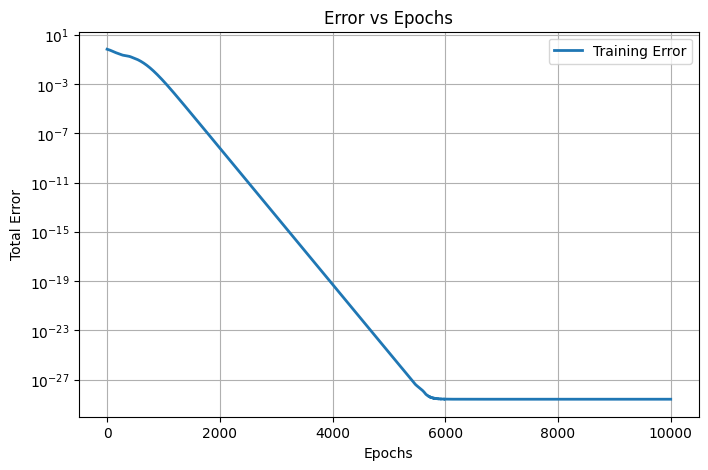

In [ ]:
#Seprate arrays
epoch, errors = zip(*supError)
epoch = np.array(epoch)
errors = np.array(errors)

#Plotting the error
plt.figure(figsize=(8,5))
plt.plot(epoch, errors, label="Training Error", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Error vs Epochs")
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

##Retrospective:
I learned a lot from doing this. For starters, I learned why we use arrays in ML, it's so we can train off multiple datapoints at one time. This is also where batching comes in, while not used in this project, it would be used to feed in a subsect of the data, so the matrix multiplication doesn't get too large and expensive. The next thing I learned was how to apply backpropagation to a matrix (this was mostly learned by working it out myself but still learned it). I think I got to see saddle points first hand as well, as I'd frequently hit points where the error would just get stuck (sometimes at 1 other at 0.5). It ocurred less when I made the model larger, but right now it found a good point on the minimal parameters version.

